<a href="https://colab.research.google.com/github/askolesov0608/SJK0015/blob/main/chap2_FIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robotics, Vision & Control 3e: for Python
## Chapter 2: Representing position & orientation

Copyright (c) 2021- Peter Corke

In [ ]:
try:
    from google.colab import output #"Attempt to import output from the google.colab module. This is necessary for working with custom widgets in Google Colab."
    print('Running on CoLab')
    output.enable_custom_widget_manager()
    !pip install ipympl #"Installing the ipympl package. This package allows you to use matplotlib in interactive mode in Jupyter notebooks and Colab."
    !pip install spatialmath-python #"The spatialmath-python package, which provides tools for working with spatial mathematics in Python, such as for robotics or geometric calculations."
    COLAB = True
    SWIFT = False
except ModuleNotFoundError:
    COLAB = False
    SWIFT = False
#импортирует класс InteractiveShell из модуля IPython.core.interactiveshell.
#InteractiveShell является базовым классом для интерактивной оболочки IPython,
#который управляет выполнением кода и отображением результатов."
from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "last_expr_or_assign" -
#эта строка настраивает параметр ast_node_interactivity интерактивной оболочки IPython.
#Значение "last_expr_or_assign" означает, что IPython будет отображать значение
#последнего выражения или результат последнего присваивания в ячейке. Это полезно,
#когда вы хотите видеть результаты без необходимости явно вызывать print()
#или другие функции отображения для каждой операции.
#По умолчанию, IPython отображает только последнее выражение,
#но с этой настройкой вы также можете увидеть результаты присваиваний.
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"


#from IPython.display import HTML - эта строка импортирует класс HTML из
#модуля IPython.display. HTML позволяет отображать HTML-код напрямую в ячейке Jupyter Notebook или Google Colab.
#Это может быть использовано для вставки форматированных текстов, таблиц,
#интерактивных элементов или любого другого содержимого, которое можно описать с помощью HTML,
#непосредственно в документацию или отче
from IPython.display import HTML

# standard imports
import numpy as np

#3импортирует модуль линейной алгебры из библиотеки SciPy под именем linalg.
#SciPy расширяет функциональность NumPy, добавляя полезные функции для оптимизации,
# линейной алгебры, интеграции и статистики.
from scipy import linalg

#это магическая команда IPython, предназначенная для использования в Jupyter Notebook.
#Она активирует интерактивный режим визуализации с помощью библиотеки Matplotlib,
#позволяя взаимодействовать с графиками (например, масштабирование и вращение в трехмерном пространстве).
%matplotlib widget

import matplotlib.pyplot as plt
import math
from math import pi

#np.set_printoptions(...) - настраивает параметры печати для объектов NumPy,
#улучшая читаемость вывода массивов, особенно для чисел с плавающей точкой,
#путем установки ширины строки и формата вывода чисел.
np.set_printoptions(

# linewidth=120: Этот параметр устанавливает максимальную длину строки при печати массивов.
#Значение 120 символов означает, что каждая строка вывода будет пытаться уместиться в ширину 120 символов
#перед переносом на новую строку. Это может сделать вывод массивов более удобным для чтения на широких
#экранах или в средах с большим разрешением.
     linewidth=120, formatter={
        #Этот параметр задает способ форматирования чисел с плавающей точкой.
        #Используется словарь с ключом 'float', указывающим, что правила форматирования будут применяться к числам с плавающей точкой.

        #: Это лямбда-функция, которая задает форматирование для каждого числа с плавающей точкой x в массиве.
        #Форматирование зависит от абсолютного значения x:
        #Если абсолютное значение x меньше  1×10 в степени−10
        #(то есть число очень близко к нулю), оно считается нулевым и выводится как 0 с
        #шириной поля 8 символов и 4 значащими цифрами (8.4g).
        #В противном случае число x выводится в формате с плавающей точкой с использованием общего формата (g),
        #который автоматически выбирает между фиксированным и экспоненциальным представлениями
        #в зависимости от величины числа. Ширина поля также составляет 8 символов с 4 значащими цифрами.
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})

#устанавливает начальное значение генератора случайных чисел NumPy
# для обеспечения повторяемости результатов. Аргумент 0 гарантирует,
#что каждый раз, когда вы запускаете свой скрипт, генерируются одни и те же случайные числа.
np.random.seed(0)

#from spatialmath import * и from spatialmath.base import * -
#импортируют функции и классы из библиотеки spatialmath и ее подмодуля base.
#spatialmath предназначена для работы с пространственной математикой и робототехникой,
#предоставляя инструменты для представления и манипуляции с трехмерными пространственными трансформациями.
from spatialmath import *
from spatialmath.base import *

Running on CoLab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 36.1 MB/s eta 0:00:00
  Created wheel for colored: filename=colored-1.4.4-py3-none-any.whl size=14249 sha256=15aeef98e7df7f6d2b9e1eb6d7566133e02f448741280b6c5386becce1e4ce44
  Stored in directory: /root/.cache/pip/wheels/e7/c3/07/fabb0941ff5df7a487d43a67081273045536cc96d4d0e816b4
Successfully built colored


There are some minor code changes compared to the book. These are to support
![2024-02-04_20-57-45.png]()the Matplotlib widget (ipympl) backend.  This allows 3D plots to be rotated
so the changes are worthwhile.

# 2.1 Foundations


# 2.2 Working in Two Dimensions (2D)


## 2.2.1 Orientation in Two Dimensions


### 2.2.1.1 2D Rotation Matrix


In [ ]:
#R = rot2(0.3): Эта строка использует функцию rot2 для создания матрицы вращения на угол 0.3 радиана
#в двумерном пространстве. Функция rot2 предположительно возвращает 2x2 матрицу вращения,
#которая позволяет вращать точки или векторы вокруг начала координат на указанный угол.
R = rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

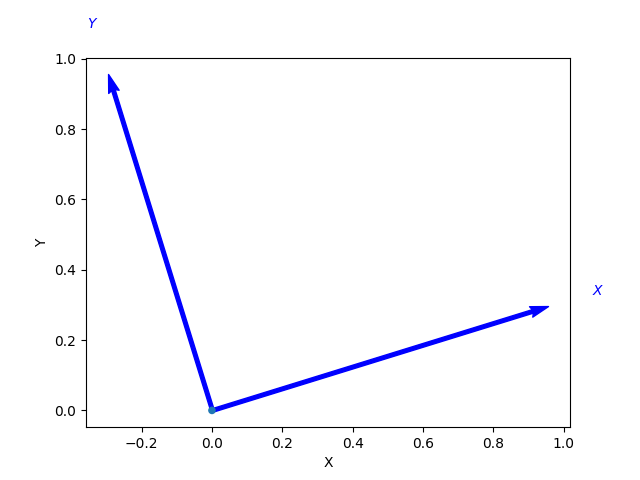

In [ ]:
#Эта команда, вероятно, подготавливает новое пространство для рисования или
#устанавливает параметры визуализации в Matplotlib для отображения двумерных трансформаций.
#Параметр new=True может указывать на создание новой области рисования.
plotvol2(new=True)  # for matplotlib/widget
#trplot2(R): Использует функцию trplot2 для визуализации эффекта матрицы вращения R на двумерной плоскости.
#Функция trplot2 предназначена для отрисовки двумерных трансформаций, таких как вращение и сдвиг.
trplot2(R);

In [ ]:
#np.linalg.det(R): Вызывается дважды и вычисляет определитель матрицы вращения R.
#Определитель матрицы вращения в двумерном пространстве всегда равен 1,
#поскольку вращение сохраняет площадь и ориентацию.
np.linalg.det(R)

0.9999999999999999

In [ ]:
np.linalg.det(R)

0.9999999999999999

In [ ]:
 #Импортирует необходимые функции и классы из SymPy для работы с символьной математикой.
from sympy import Symbol, Matrix, simplify, pprint
#Создает символьную переменную theta, которая может использоваться для выражения угла вращения.
theta = Symbol('theta')
#Конвертирует результат функции rot2, вызванной с символьным аргументом theta,
#в матрицу SymPy для дальнейших символьных вычислений.
R = Matrix(rot2(theta))  # convert to SymPy matrix

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [ ]:
#simplify(R * R): Эта команда умножает матрицу вращения R, выраженную через θ, саму на себя,
#и затем упрощает результат. В контексте вращения в двумерном пространстве, умножение матрицы вращения на себя эквивалентно
#выполнению двух последовательных вращений на угол θ. Результатом будет матрица вращения на угол 2 2θ.
simplify(R * R)


Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

In [ ]:
#Эта команда вычисляет определитель матрицы R.
#Для матрицы вращения в двумерном пространстве определитель всегда равен 1,
#независимо от угла θ, так как вращение является ортогональным преобразованием, сохраняющим ориентацию и масштаб.
R.det()

sin(theta)**2 + cos(theta)**2

In [ ]:
# Эта команда вычисляет определитель матрицы R.
#Для матрицы вращения в двумерном пространстве определитель всегда равен 1, независимо от угла θ,
#так как вращение является ортогональным преобразованием, сохраняющим ориентацию и масштаб.
R.det().simplify()

1

### 2.2.1.2 Matrix Exponential for Rotation


In [ ]:
#создает матрицу вращения на 0.3 радиана в двумерном пространстве
R = rot2(0.3);

In [ ]:
#использует функцию logm из SciPy для вычисления логарифма матрицы вращения R,
#что дает матричное представление вектора угловой скорости.
L = linalg.logm(R)  # using linalg package of SciPy

array([[       0,     -0.3],
       [     0.3,        0]])

In [ ]:
#преобразует матрицу скоса L в вектор угловой скорости с помощью функции vex.
S = vex(L)

array([     0.3])

In [ ]:
# создает матрицу скоса для вектора с единственным элементом 2.
X = skew(2)

array([[       0,       -2],
       [       2,        0]])

In [ ]:
#преобразует X обратно в вектор.
vex(X)

array([       2])

In [ ]:
#вычисляют экспоненциальную матрицу от L и от скоса вектора S,
#соответственно, что возвращает матрицу вращения.
linalg.expm(L)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [ ]:
#вычисляют экспоненциальную матрицу от L и от скоса вектора S,
#соответственно, что возвращает матрицу вращения.
linalg.expm(skew(S))

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

## 2.2.2 Pose in Two Dimensions


### 2.2.2.1 2D Homogeneous Transformation Matrix


In [ ]:
#создают матрицы вращения для вращения на 0.3 радиана.
rot2(0.3)


array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [ ]:
#создают трансформационные матрицы для вращения на 0.3 радиана. используя Z
trot2(0.3)

array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

In [ ]:
#создает однородную трансформационную матрицу, комбинируя трансляцию и вращение.
TA = transl2(1, 2) @ trot2(30, "deg")

array([[   0.866,     -0.5,        1],
       [     0.5,    0.866,        2],
       [       0,        0,        1]])

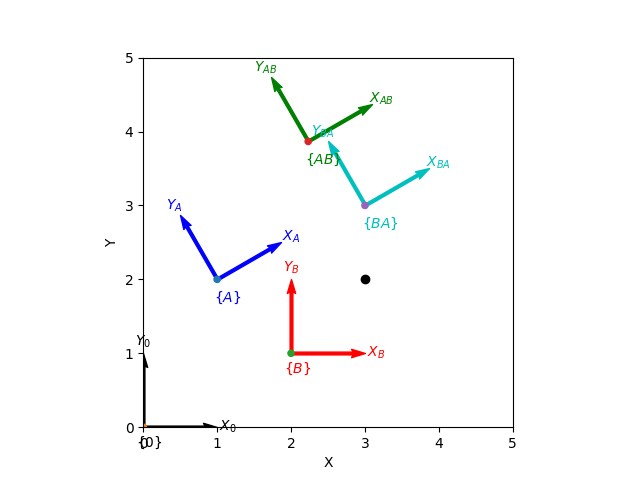

In [ ]:
plotvol2([0, 5], new=True); # new plot with both axes from 0 to 5
trplot2(TA, frame="A", color="b"); # визуализирует трансформацию TA, представляющую собой комбинацию вращения и перемещения.
                                   #Система координат для этой трансформации обозначается как "A" и отображается синим цветом.
T0 = transl2(0, 0);
trplot2(T0, frame="0", color="k");  #  визуализирует базовую систему координат, обозначенную как "0", черным цветом.
                                    #Это служит точкой отсчета для других трансформаций.

TB = transl2(2, 1)                    #создает трансформацию TB, представляющую перемещение на 2 единицы
trplot2(TB, frame="B", color="r");    #по оси X и на 1 единицу по оси Y. TB, отображается красным цветом.

TAB = TA @ TB                           #вычисляет комбинированную трансформацию TAB путем умножения матриц трансформаций TA и TB.
trplot2(TAB, frame="AB", color="g");    #комбинированной трансформации "AB", отображается зеленым цветом.


TBA = TB @ TA;                           #вычисляет комбинированную трансформацию TBA с обратным порядком умножения TB и TA.
trplot2(TBA, frame="BA", color="c");     #визуализирует результат комбинированной трансформации "BA", отображается голубым (бирюзовым)

P = np.array([3, 2]);                      #задает координаты точки P в 2D пространстве.
plot_point(P, "ko", label="P");            #визуализирует точку P на графике, отмечая ее черным кружком ("ko") и меткой "P".

In [ ]:
print(TA) # выводит на экран матрицу трансформации TA. Эта матрица представляет собой комбинацию перемещения и вращения в двумерном пространстве.
print(P) # выводит координаты точки P в двумерном пространстве.
np.linalg.inv(TA) @ np.hstack([P, 1]) #применяет обратную трансформацию к точке P,
                #превращая её в однородные координаты (добавляя 1 в конец) для выполнения аффинного преобразования.
                #Это позволяет определить новые координаты точки P после применения обратной трансформации TA.

[[   0.866     -0.5        1]
 [     0.5    0.866        2]
 [       0        0        1]]
[3 2]


array([   1.732,       -1,        1])

In [ ]:
h2e(np.linalg.inv(TA) @ e2h(P))  #сначала преобразует точку P в однородные координаты (e2h),
                     #применяет к ней обратную трансформацию TA, а затем возвращает
                     #результат обратно в евклидовы координаты (h2e). Это позволяет увидеть,
                     #как точка P переместится относительно исходной системы координат после применения обратной трансформации.

array([[   1.732],
       [      -1]])

In [ ]:
homtrans(np.linalg.inv(TA), P) #выполняет аналогичное действие, используя функцию homtrans для применения обратной
                             # трансформации к точке P, что упрощает код за счет использования встроенной функции вместо ручного
                             #преобразования между однородными и евклидовыми координатами.

array([[   1.732],
       [      -1]])

### 2.2.2.2 Rotating a Coordinate Frame


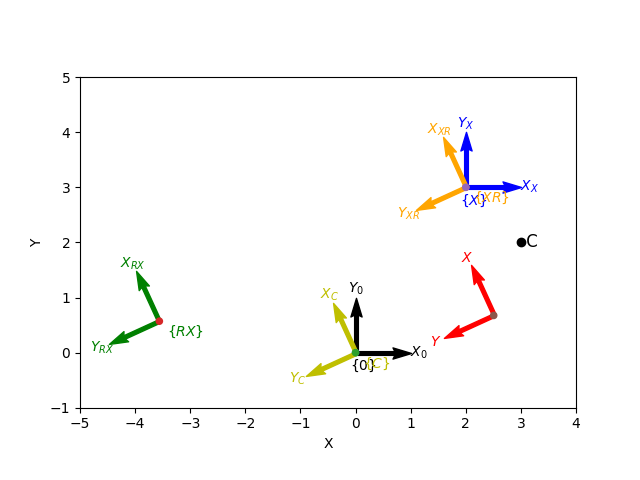

In [ ]:
plotvol2([-5, 4, -1, 5], new=True);  # for matplotlib/widget создает новую область визуализации с
                                       #заданными пределами по осям X и Y. Это подготавливает пространство для отображения трансформаций.

T0 = transl2(0, 0);                      #создает трансформацию, представляющую начальное положение в системе координат.
trplot2(T0, frame="0", color="k");       # визуализирует базовую систему координат с меткой "0", используя черный цвет.

TX = transl2(2, 3);                      #создает трансформацию перемещения в точку (2, 3)
trplot2(TX, frame="X", color="b");       # визуализирует систему координат после перемещения с меткой "X" синего цвета.

TR = trot2(2);                            # создает трансформацию вращения на угол 2 радиана.
trplot2(TR, frame="C", color="y");        #визуализируем TR желтым цветом
trplot2(TR @ TX, frame="RX", color="g");   # визуализируют результаты комбинированных трансформаций вращения и перемещения
trplot2(TX @ TR, frame="XR", color="orange");


C = np.array([3, 2]);   #задает точку в пространстве, вокруг которой будет выполнено вращение.
plot_point(C, "ko", text="C"); #отображает точку "C" на графике.
TC = transl2(C) @ TR @ transl2(-C)  #создает трансформацию, которая сначала перемещает систему координат в точку "C", выполняет вращение, а затем возвращает обратно.
trplot2(TC @ TX, framelabel="XC", color="r"); #визуализирует результат применения созданной трансформации к "TX", показывая новую позицию и ориентацию системы координат с меткой "XC" красного цвета.

### 2.2.2.3 Matrix exponential for Pose


Определение: Матрица Ли представляет собой алгебраическую структуру, используемую для описания непрерывных групп преобразований, таких как вращения или перемещения в пространстве. В контексте робототехники и автоматизации, матрицы Ли часто используются для описания кинематических и динамических свойств систем.
Применение: Логарифм матрицы трансформации позволяет перейти от представления трансформации в виде матрицы (обычно однородной) к представлению в виде вектора в пространстве Ли. Этот вектор может включать компоненты угловой скорости (для вращений) и скорости перемещения (для трансляций).
Аффинная трансформация: В вашем коде TC представляет собой аффинную трансформацию, выполненную с помощью однородной трансформационной матрицы. Аффинные трансформации включают в себя вращения, масштабирование, сдвиг и трансляции, сохраняя точки, прямые и плоскости. Они также сохраняют соотношения между точками, делая их особенно полезными в геометрии и робототехнике.
Логарифмирование TC: Вычисление логарифма аффинной трансформации TC позволяет "развернуть" трансформацию в линейное пространство, упрощая анализ и комбинацию последовательных трансформаций. Например, если вам нужно объединить несколько вращений и перемещений, работа в пространстве Ли может быть более эффективной.

НЕмного визула




In [ ]:
def plot_transform(ax, T, label=None, color='r'):
    """
    Визуализирует аффинную трансформацию в 2D.
    """
    # Точки для отображения осей координат
    points = np.array([[0, 0, 1], [1, 0, 1], [0, 1, 1]]).T
    # Применяем трансформацию
    transformed_points = T @ points

    # Рисуем оси
    ax.plot([points[0, 0], points[0, 1]], [points[1, 0], points[1, 1]], 'k-', lw=2)
    ax.plot([points[0, 0], points[0, 2]], [points[1, 0], points[1, 2]], 'k-', lw=2)
    ax.plot([transformed_points[0, 0], transformed_points[0, 1]], [transformed_points[1, 0], transformed_points[1, 1]], color+'-', lw=2)
    ax.plot([transformed_points[0, 0], transformed_points[0, 2]], [transformed_points[1, 0], transformed_points[1, 2]], color+'-', lw=2)

    if label:
        ax.text(transformed_points[0, 1], transformed_points[1, 1], f"{label}X", color=color, fontsize=12)
        ax.text(transformed_points[0, 2], transformed_points[1, 2], f"{label}Y", color=color, fontsize=12)

    ax.set_aspect('equal')
    ax.grid(True)



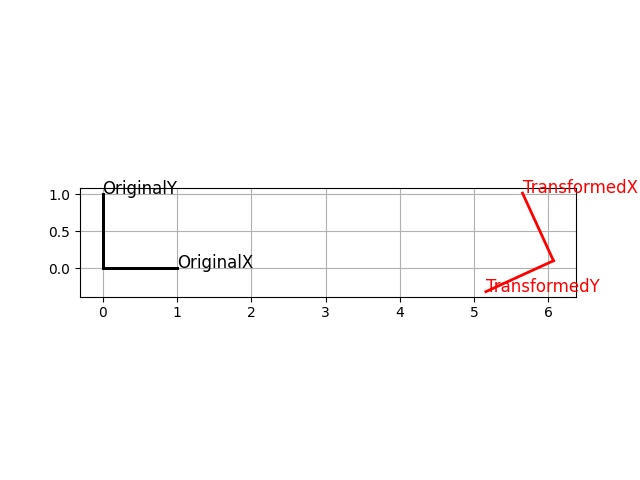

In [ ]:

# Визуализация
fig, ax = plt.subplots()
plot_transform(ax, np.eye(3), label="Original", color='k')  # Исходное положение
plot_transform(ax, TC, label="Transformed", color='r')  # После применения TC
plt.show()
trplot2(TC , framelabel="TC", color="r"); #визуализирует результат применения созданной трансформации к "TX", показывая новую позицию и ориентацию системы координат с меткой "XC" красного цвета.

## Матричная экспонента: linalg.expm
Определение: Матричная экспонента expm(A) функции от матрицы
A является обобщением понятия экспоненциальной функции для матриц. Она определяется через степенной ряд:expm(A)=∑(от n=0 до бескон)1/n!A в степени n где A — квадратная матрица, а An  обозначает матрицу, возведенную в степень
n.
 Матричная экспонента применяется в различных областях, включая решение систем линейных дифференциальных уравнений, теорию управления и робототехнику, для представления процессов вращения и перемещения. Она позволяет перейти от алгебраического (линейного) представления векторов угловой скорости и скорости перемещения к геометрическим преобразованиям в пространств

# Матричный логарифм: linalg.logm
Определение: Матричный логарифм logm(A) функции от матрицы
A является обратной операцией к матричной экспоненте. Он вычисляется так, чтобы для матрицы =logm()B=logm(A) выполнялось условие =expm()A=expm(B).
Применение: Матричный логарифм используется для "развертывания" геометрических трансформаций в линейное пространство, что упрощает анализ и комбинирование последовательных преобразований. Это особенно полезно в областях, где требуется работа с комплексными последовательностями вращений и перемещений, например, в компьютерной графике, робототехнике и теории управления.

In [ ]:
#вычисляет логарифм трансформационной матрицы TC, что позволяет представить аффинную трансформацию в виде матрицы Ли.

L = linalg.logm(TC)


array([[       0,       -2,        4],
       [       2,        0,       -6],
       [       0,        0,        0]])

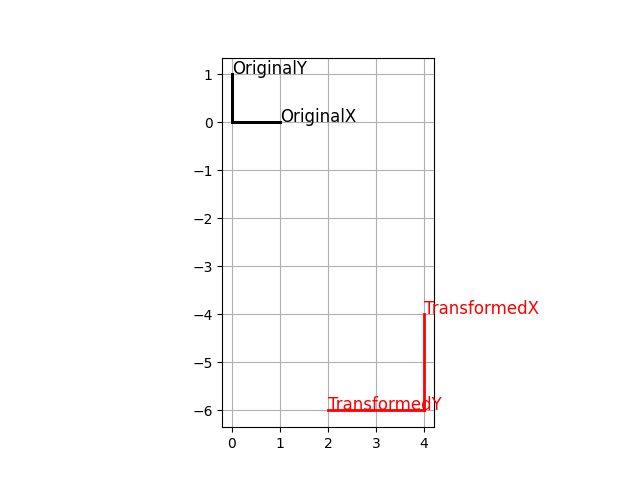

In [ ]:
fig, ax = plt.subplots()
plot_transform(ax, np.eye(3), label="Original", color='k')  # Исходное положение
plot_transform(ax, L, label="Transformed", color='r')  # После применения TC
plt.show()

In [ ]:
#преобразует матрицу Ли в вектор угловой скорости и скорости перемещения.
S = vexa(L)

array([       4,       -6,        2])

In [ ]:
#вычисляет экспоненциальную матрицу из векторного представления S, возвращая к аффинной трансформации.
ASD = linalg.expm(skewa(S))
linalg.expm(skewa(S))

array([[ -0.4161,  -0.9093,    6.067],
       [  0.9093,  -0.4161,   0.1044],
       [       0,        0,        1]])

In [ ]:
#демонстрируют создание матрицы скоса из вектора .
X = skewa([1, 2, 3])

array([[       0,       -3,        1],
       [       3,        0,        2],
       [       0,        0,        0]])

In [ ]:
#демонстрируют обратное преобразование, в матрицу скоса из вектора.

vexa(X)

array([       1,        2,        3])

### 2.2.2.4 2D Twists


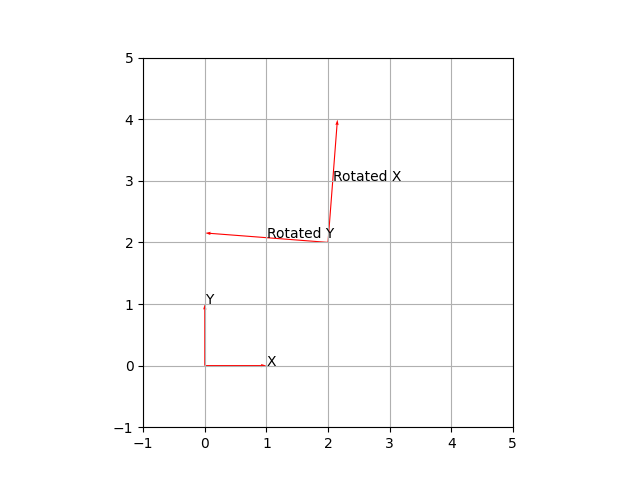

In [ ]:
def plot_twist(ax, origin, direction, magnitude, label=None):
    """
    Визуализирует Twist как стрелку в 2D.

    :param ax: Объект осей Matplotlib.
    :param origin: Точка начала стрелки (x, y).
    :param direction: Направление стрелки (dx, dy).
    :param magnitude: Длина стрелки.
    :param label: Надпись рядом со стрелкой.
    """
    ax.quiver(*origin, *direction, scale=magnitude, scale_units='xy', angles='xy', width=0.003, color='r')
    if label:
        ax.text(origin[0] + direction[0], origin[1] + direction[1], label)

def visualize_rotation_twist(C, angle):
    """
    Визуализирует вращательный Twist вокруг точки C.

    :param C: Точка вращения (x, y).
    :param angle: Угол вращения в радианах.
    """
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    ax.grid(True)

    # Визуализация исходной системы координат
    plot_twist(ax, (0, 0), (1, 0), 1, 'X')
    plot_twist(ax, (0, 0), (0, 1), 1, 'Y')

    # Визуализация вращения вокруг точки C
    plot_twist(ax, C, (np.cos(angle), np.sin(angle)), 0.5, 'Rotated X')
    plot_twist(ax, C, (-np.sin(angle), np.cos(angle)), 0.5, 'Rotated Y')

    plt.show()

# Пример использования
C = (2, 2)  # Точка вращения
angle = 2 * 180/pi  # Угол вращения 45 градусов
visualize_rotation_twist(C, angle)

In [ ]:
S = Twist2.UnitRevolute(C) #создает единичный вращательный (революционный) 2D Twist вокруг точки C. Этот Twist описывает вращение на единицу угла (обычно радиан) вокруг заданной точки C в двумерном пространстве.
                           #Этот код создает вращательный твист в двумерном пространстве, который вращает координатную систему вокруг точки C. Твист характеризуется матрицей (2 -3; 1), которая представляет собой параметры вращения. Этот вращательный твист может быть использован для описания вращательного движения или трансформаций между координатными системами в данной программе или библиотеке.
print ("C", C)             ## Почему на 2 радиана
print ("S", S)

C (2, 2)
S (2 -2; 1)


In [ ]:
#экспоненциальное преобразование Twist в аффинную трансформационную матрицу, применяя двойное значение угла вращения 2 радиана. skewa
B = linalg.expm(skewa(2 * S.S))
print ("B", B)
print ("S", S)

B [[ -0.4161  -0.9093    4.651]
 [  0.9093  -0.4161    1.014]
 [       0        0        1]]
S (2 -2; 1)


In [ ]:
S.exp(2) #экспоненциальное преобразование Twist в аффинную трансформационную матрицу, применяя двойное значение угла вращения. skewa

  -0.4161   -0.9093    4.651     
   0.9093   -0.4161    1.014     
   0         0         1         


### Визуализация

где a, b, c, и d — элементы, относящиеся к вращению и масштабированию, а tx и ty — элементы трансляции. Угол вращения
θ можно вычислить, используя арктангенс:=arctan2(с,a)=arctan2(b,d) θ=arctan2(0.9093,−0.4161)

In [ ]:
""""
def translation_matrix(dx, dy):
    """Создает матрицу аффинной трансформации для трансляции."""
    return np.array([[1, 0, dx],
                     [0, 1, dy],
                     [0, 0, 1]])

def rotation_matrix(theta):
    """Создает матрицу аффинной трансформации для вращения на угол theta."""
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])

def scaling_matrix(sx, sy):
    """Создает матрицу аффинной трансформации для масштабирования."""
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

points = np.array([[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]]).T  # Квадрат

a = -0.4161
c = 0.9093

# Вычисление угла вращения
theta = np.arctan2(c, a)

# Преобразование угла из радианов в градусы
theta_deg = np.degrees(theta)

# Трансформации
T = translation_matrix(2, 3)  # Перемещение на (2, 3)
R = rotation_matrix(theta_deg)  # Вращение на 45 градусов
S = scaling_matrix(2, 0.5)  # Масштабирование: x2 по оси X и x0.5 по оси Y



print(f"Угол вращения: {theta} радиан, или {theta_deg} градусов.")


# Применение трансформаций
transformed_points_T = T @ points
transformed_points_R = R @ points
transformed_points_S = S @ points

# Визуализация
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(points[0, :], points[1, :], 'b-o')
ax[0].set_title('Original')
ax[1].plot(transformed_points_T[0, :], transformed_points_T[1, :], 'g-o')
ax[1].set_title('Translation')
ax[2].plot(transformed_points_R[0, :], transformed_points_R[1, :], 'r-o')
ax[2].set_title('Rotation')
ax[3].plot(transformed_points_S[0, :], transformed_points_S[1, :], 'm-o')
ax[3].set_title('Scaling')

for a in ax:
    a.set_xlim(-5, 5)
    a.set_ylim(-5, 5)
    a.set_aspect('equal')
    a.grid(True)

plt.show()
"""

SyntaxError: invalid syntax (<ipython-input-37-a5179ff91fff>, line 3)

In [ ]:
S.pole #возвращает положение полюса (точку вращения) для революционного Twist.

array([       2,        2])

### S = Twist2.UnitPrismatic([0, 1]):
Создает единичный сдвиговый (призматический) Twist, который описывает движение в направлении оси Y. Вектор [0, 1] указывает направление движения, а отсутствие компонента вращения подразумевает, что центр вращения находится в бесконечности.

In [ ]:
S = Twist2.UnitPrismatic([0, 1]) #создает единичный сдвиговый (призматический) 2D Twist, который описывает сдвиг
                                 #на единицу длины в направлении заданного вектора, в данном случае вдоль оси Y.

(0 1; 0)

### Экспоненцирование сдвигового TwistS.exp(2):
Масштабирует и экспоненцирует призматический Twist, что приводит к аффинной трансформации, соответствующей сдвигу на 2 единицы в направлении Y. Результатом является матрица аффинной трансформации без вращения, с чисто трансляционным сдвигом на 2 единицы по оси Y.

In [ ]:
S.exp(2) #рименяет экспоненциальное преобразование к сдвиговому Twist, умножая его величину на 2,
        # чтобы получить матрицу аффинной трансформации, соответствующую сдвигу на двойную длину в заданном направлении.

   1         0         0         
   0         1         2         
   0         0         1         


### Создание произвольной 2D аффинной трансформации T = transl2(3, 4) @ trot2(0.5):
Комбинирует трансляцию на вектор (3, 4) с вращением на 0.5 радиан (около 28.65 градусов). Результат — аффинная трансформация в SE(2), которая инкапсулирует и вращение, и трансляцию.

In [ ]:
T = transl2(3, 4) @ trot2(0.5) #Эта строка создаёт аффинную трансформацию, комбинируя трансляцию (перемещение)
               #на вектор (3, 4) с вращением на угол 0.5 радиан. transl2 создаёт матрицу трансляции для 2D пространства,
               # а trot2 — матрицу вращения.
               #Операция @ используется для умножения матриц, что приводит к комбинации этих двух трансформаций в одну матрицу T.
               #----Для произвольного двумерного однородного преобразования:

array([[  0.8776,  -0.4794,        3],
       [  0.4794,   0.8776,        4],
       [       0,        0,        1]])

### Преобразование аффинной трансформации в Twist, S = Twist2(T):
 Преобразует аффинную трансформацию T в вектор Twist S, который описывает соответствующее движение через угловую скорость (вращение) и вектор сдвига.

In [ ]:
S = Twist2(T) #Преобразует аффинную трансформацию T в вектор Twist. В контексте робототехники,
               #Twist представляет собой модель, описывающую движение в пространстве через угловую и линейную скорости.
               #В данном случае, Twist2 вероятно преобразует 2D трансформацию в соответствующий 2D Twist.
               #---твист можно выразить как:

(3.9372 3.1663; 0.5)

### Получение параметров из Twist S.w:
Возвращает угловую скорость (вращение) из Twist, что равно 0.5 радиан.
### S.pole:
 Возвращает точку вокруг которой происходит вращение. В данном случае это [-3.166, 3.937], что представляет собой координаты центра вращения.

In [ ]:
S.w # ---что описывает вращение:

0.5

In [ ]:
S.pole #--вокруг точки:

array([  -3.166,    3.937])

### Экспоненцирование Twist для восстановления аффинной трансформации S.exp(1):
Экспоненцирует Twist S, восстанавливая исходную аффинную трансформацию T. Это показывает, как Twist полностью описывает аффинное преобразование через угловую скорость и центр вращения.

In [ ]:
S.exp(1) #и экспонентирование этого твиста:
         # приведет к исходному преобразованию SE.2/ - полностью описанному тремя элементами вектора твиста.

   0.8776   -0.4794    3         
   0.4794    0.8776    4         
   0         0         1         


# 2.3 Working in Three Dimensions (3D)


## 2.3.1 Orientation in Three Dimensions


### 2.3.1.1 3D Rotation Matrix


In [ ]:
R = rotx(pi / 2) #Создает матрицу вращения вокруг оси X на угол π/2 радиан (90 градусов).
                 # Это изменяет ориентацию объекта так, что его оси Y и Z поворачиваются на 90 градусов вокруг оси X.

array([[       1,        0,        0],
       [       0,        0,       -1],
       [       0,        1,        0]])

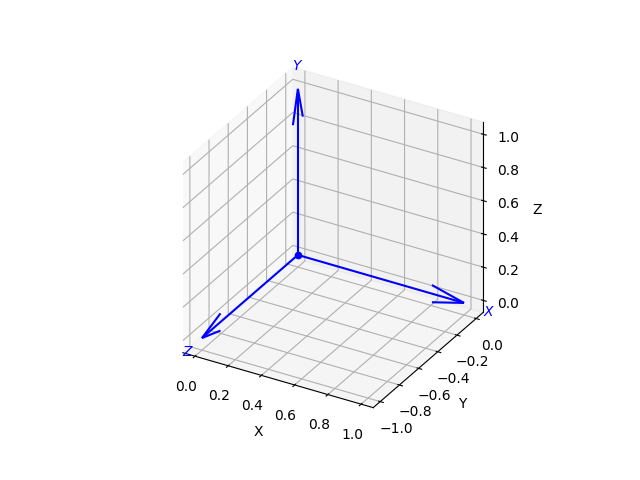

In [ ]:
plotvol3(new=True)  # for matplotlib/widget  Подготавливает трехмерное пространство для визуализации вращений
trplot(R); #Визуализирует результат вращения, представленный матрицей R, в виде трехмерной системы координат.

In [ ]:
# tranimate(R)
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, movie=True, dim=2)) # Создает анимацию вращения на основе матрицы R

<span style="background-color:red; font-size:20pt">NOTE</span>

Robust, portable animation in Jupyter notebooks is challenging.  Here we use an option to `tranimate` that causes it to return the animation as a snippet of HTML5 which is then displayed
```
HTML(tranimate(R, movie=True))
```
If you wish to animate a coordinate frame from a regular Python script use the simpler syntax
```
tranimate(R)
```


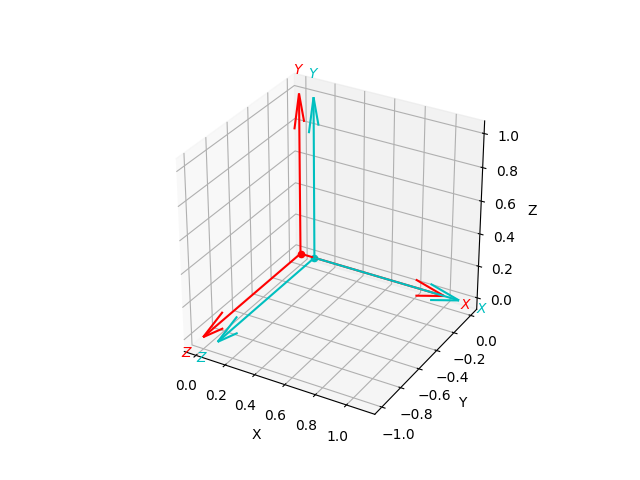

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
trplot(R, anaglyph=True) #Эти команды создадут эффект 3D, который будет более выразительным,
                         #если вы используете анаглифические стереоочки.

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
HTML(tranimate(R, anaglyph=True, movie=True, dim=1.5)) #Эти команды создадут эффект 3D, который будет более выразительным,
                         #если вы используете анаглифические стереоочки.

[[       0        0        1]
 [       1        0        0]
 [       0        1        0]]


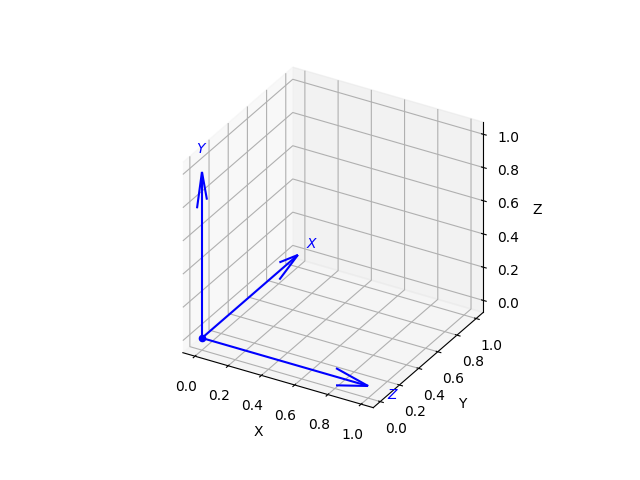

In [ ]:
R = rotx(pi / 2) @ roty(pi / 2) #Комбинирует вращение вокруг оси X на 90 градусов с последующим вращением вокруг
                                #оси Y на 90 градусов. Результатом является матрица R, представляющая общее вращение.
plotvol3(new=True)
trplot(R);
print( R)


In [ ]:
Ryx = roty(pi / 2) @ rotx(pi / 2) #Альтернативная комбинация вращений, где сначала выполняется вращение вокруг оси Y,
                           # а затем вокруг оси X. Это демонстрирует, что порядок вращений влияет на конечный результат.
K = Ryx
#plotvol3(new=True)
#trplot(K);

array([[       0,        1,        0],
       [       0,        0,       -1],
       [      -1,        0,        0]])

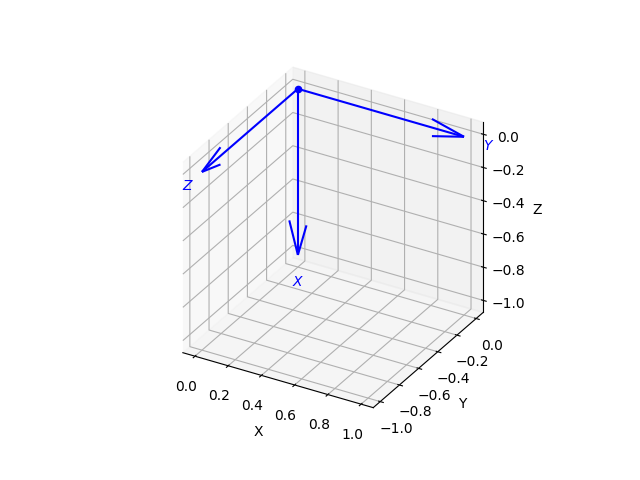

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
trplot(Ryx);

## Углы Эйлера и Последовательности Вращений
Например, в механической динамике часто используется последовательность ZYZ, где вращение происходит сначала вокруг оси Z, затем оси Y, и снова оси Z.

### 2.3.1.2 Three-Angle Representations


### Прямая задача:
Для создания матрицы вращения с углами Эйлера 0.1, 0.2, 0.3 в последовательности ZYZ, можно использовать комбинацию функций rotz и roty или более удобную функцию eul2r
Оба подхода дают матрицу вращения R, которая представляет собой комбинацию вращений вокруг осей с заданными углами.

Ограничения: Одним из недостатков углов Эйлера является явление под названием "сингулярность" или "проблема блокировки вала", когда две оси вращения становятся параллельными, что приводит к потере одной степени свободы вращения. Это ограничивает их применение в некоторых сценариях.

In [ ]:
"""
Определение: Углы Эйлера — это три угла, введенные Леонардом Эйлером для описания ориентации твердого тела относительно фиксированной системы координат.
Они представляют собой последовательные вращения вокруг трех осей координатной системы.
Последовательности вращений: Существует двенадцать возможных последовательностей вращений,
 которые могут быть использованы для определения углов Эйлера, включая:
Вращения вокруг разных осей (например, XYZ, ZYX, ZYZ и т.д.).
Каждая последовательность определяет уникальный способ достижения любой заданной ориентации объекта из его исходного положения.
ZYZ последовательность: Одна из наиболее часто используемых последовательностей вращений, особенно в механической динамике и робототехнике.
Она представляет собой вращение вокруг оси Z, затем вокруг новой оси Y и, наконец, вокруг новой оси Z.
Эта последовательность позволяет полностью описать ориентацию объекта в пространстве.
Вычисление углов Эйлера: Для данной матрицы ориентации объекта можно вычислить соответствующие углы Эйлера, используя обратные тригонометрические функции.
Это позволяет интерпретировать ориентацию объекта в терминах углов Эйлера.
Визуализация и анимация: С помощью углов Эйлера и соответствующих матриц вращения можно визуализировать ориентацию и движение объектов в 3D-пространстве, включая создание анимаций перемещений."""

'\nОпределение: Углы Эйлера — это три угла, введенные Леонардом Эйлером для описания ориентации твердого тела относительно фиксированной системы координат.\nОни представляют собой последовательные вращения вокруг трех осей координатной системы.\nПоследовательности вращений: Существует двенадцать возможных последовательностей вращений,\n которые могут быть использованы для определения углов Эйлера, включая:\nВращения вокруг разных осей (например, XYZ, ZYX, ZYZ и т.д.).\nКаждая последовательность определяет уникальный способ достижения любой заданной ориентации объекта из его исходного положения.\nZYZ последовательность: Одна из наиболее часто используемых последовательностей вращений, особенно в механической динамике и робототехнике.\nОна представляет собой вращение вокруг оси Z, затем вокруг новой оси Y и, наконец, вокруг новой оси Z.\nЭта последовательность позволяет полностью описать ориентацию объекта в пространстве.\nВычисление углов Эйлера: Для данной матрицы ориентации объекта мо

In [ ]:
R = rotz(0.1) @ roty(0.2) @ rotz(0.3);
print (R)

[[  0.9021  -0.3836   0.1977]
 [  0.3875   0.9216  0.01983]
 [ -0.1898  0.05871   0.9801]]


In [ ]:
R = eul2r(0.1, 0.2, 0.3)

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

In [ ]:
gamma = tr2eul(R) #Обратная задача: Определение углов Эйлера для заданной матрицы вращения R
                  #можно выполнить с помощью функции tr2eul

array([     0.1,      0.2,      0.3])

In [ ]:
eul2r(gamma)

array([[  0.9021,  -0.3836,   0.1977],
       [  0.3875,   0.9216,  0.01983],
       [ -0.1898,  0.05871,   0.9801]])

В этих строках кода демонстрируется использование функций для работы с углами Эйлера и углами крена, тангажа и рыскания (Roll, Pitch, Yaw - RPY) в контексте преобразований ориентации в трехмерном пространст

In [ ]:
R = eul2r(0.1, 0, 0.3) #Создает матрицу вращения R из углов Эйлера, где углы заданы в радианах
               #для вращений вокруг осей Z, Y и снова Z (стандартная последовательность ZYZ для углов Эйлера).

array([[  0.9211,  -0.3894,        0],
       [  0.3894,   0.9211,        0],
       [       0,        0,        1]])

In [ ]:
tr2eul(R) #Обратное преобразование, которое извлекает углы Эйлера из матрицы вращения R.
          #Это позволяет определить углы вращения, которые были использованы для создания данной матрицы.

array([       0,        0,      0.4])

### Углы Roll, Pitch, Yaw (RPY)
Пример использования углов Roll, Pitch, Yaw (RPY)
В последней части отрывка описывается, как углы крена (roll), тангажа (pitch) и рыскания (yaw) используются для описания ориентации роботизированного захвата. Согласно конвенции, ось Z захвата направлена вперед, а ось Y параллельна линии между кончиками пальцев. Это ведет к последовательности углов XYZ при описании ориентации.

In [ ]:
R = rpy2r(0.1, 0.2, 0.3, order="zyx") #Эта строка кода создает матрицу вращения R для углов крена, тангажа и рыскания, заданных в порядке ZYX.

array([[  0.9363,  -0.2751,   0.2184],
       [  0.2896,   0.9564, -0.03696],
       [ -0.1987,  0.09784,   0.9752]])

In [ ]:
gamma = tr2rpy(R, order="zyx") #Эта строка кода извлекает углы крена, тангажа и рыскания из матрицы вращения R,
                               #подтверждая, что ориентация была успешно задана этими углами.

array([     0.1,      0.2,      0.3])

In [ ]:
R = rpy2r(0.1, 0.2, 0.3, order="xyz")

array([[  0.9752, -0.09784,   0.1987],
       [  0.1538,   0.9447,  -0.2896],
       [ -0.1593,    0.313,   0.9363]])

In [ ]:
gamma = tr2rpy(R, order="xyz")

array([     0.1,      0.2,      0.3])

<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it.

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [ ]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m tripleangledemo

we can't run this demo from the Colab environment (yet)


### 2.3.1.3 Singularities and Gimbal Lock


### 2.3.1.4 Two-Vector Representation


###Создание матрицы вращения с использованием векторов ориентации и подхода
R = oa2r(o, a): Функция oa2r используется для создания матрицы вращения на основе двух векторов: вектора ориентации (o) и вектора подхода (a). Даже если эти два вектора не ортогональны друг другу, они все равно определяют плоскость, а вычисленный вектор nO  будет нормальным к этой плоскости. Функция автоматически нормализует вектор O, если он не является единичным вектором.
После определения нормального вектора nO, который перпендикулярен плоскости, определяемой векторами aO и oO, можно вычислить новое значение для oO как oO′=aO​×nO.Это даст вектор oO′ , который лежит в той же плоскости,что и aO и oO, но ортогонален каждому из них, обеспечивая ортонормированную систему координат.

Указанный метод применим во многих ситуациях, где ориентацию можно определить с помощью двух векторов. Например, для камеры в качестве aO может использоваться оптическая ось (обычно ось z), а в качестве nO  — правая сторона камеры (обычно ось x). Для мобильного робота в качестве aO может использоваться вектор гравитационного ускорения, измеряемый акселерометрами (также ось z), а в качестве nO — направление движения, измеряемое электронным компасом (обычно ось x).

In [ ]:
a = [0, 0, -1] #Вектор a (approach) указывает направление подхода концевого эффектора, в данном случае вниз по оси Z.

[0, 0, -1]

In [ ]:
o = [1, 1, 0] #Вектор o (orientation) представляет ориентацию, параллельную линии между кончиками пальцев захвата, в данном случае на плоскости XY.

[1, 1, 0]

In [ ]:
R = oa2r(o, a) #Функция oa2r вычисляет матрицу вращения R, которая описывает ориентацию концевого эффектора,
               # используя вектора o и a. Если вектора не ортогональны, функция автоматически корректирует
               #их для создания ортонормированной системы координат.

array([[ -0.7071,   0.7071,        0],
       [  0.7071,   0.7071,        0],
       [       0,        0,       -1]])

### 2.3.1.5 Rotation about an Arbitrary Vector


In [ ]:
R = rpy2r(0.1, 0.2, 0.3); #Создает матрицу вращения R из углов RPY, представляющих вращение вокруг осей
                        #X (крен), Y (тангаж) и Z (рыскание) на углы 0.1, 0.2 и 0.3 радиан соответственно.

In [ ]:
theta, v = tr2angvec(R) #Извлекает угол theta и единичный вектор v вращения из матрицы R.
                        #Эти значения описывают вращение вокруг оси, определенной вектором v, на угол theta.

In [ ]:
theta

0.3655021863566987

In [ ]:
v

array([  0.1886,   0.5834,     0.79])

In [ ]:
e, x = np.linalg.eig(R) #Вычисляет собственные значения e и собственные векторы x матрицы вращения R.
                        #Собственные значения и векторы описывают оси вращения и углы, связанные с этими осями.

In [ ]:
e

array([0.93394439+0.35741835j, 0.93394439-0.35741835j, 1.        +0.j        ])

In [ ]:
x

array([[ 0.69442042+0.j        ,  0.69442042-0.j        ,  0.18857511+0.j        ],
       [-0.07921035-0.56882404j, -0.07921035+0.56882404j,  0.58337798+0.j        ],
       [-0.10726605+0.42004668j, -0.10726605-0.42004668j,  0.79000605+0.j        ]])

In [ ]:
theta = np.angle(e[0]) #Извлекает фазу (угол) из комплексного собственного значения, что может быть использовано для дополнительного анализа ориентации.

0.3655021863566988

In [ ]:
R = angvec2r(0.3, [1, 0, 0]) # используется для создания матрицы вращения R на основе угла вращения theta
                 # и единичного вектора оси вращения v. В данном контексте, угол theta равен 0.3 радиан,
                 # а вектор оси вращения v равен [1, 0, 0], что указывает на вращение вокруг оси X.
                 #R=cos(θ)I+(1−cos(θ))*vvв степT +sin(θ)S

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

### 2.3.1.6 Matrix Exponential for Rotation


In [ ]:
R = rotx(0.3) #Создает матрицу вращения R для вращения вокруг оси X на угол 0.3 радиан.

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [ ]:
L = linalg.logm(R) #Вычисляет матричный логарифм L матрицы вращения R,


array([[       0,        0,        0],
       [       0,        0,     -0.3],
       [       0,      0.3,        0]])

In [ ]:
S = vex(L)   #Операция vex(L) преобразует антисимметричную матрицу L в вектор S.
   #Этот процесс обратен операции создания антисимметричной матрицы из вектора,
   #известной как операция "скручивания" (skew). В контексте трехмерных пространственных трансформаций,
   #антисимметричная матрица часто используется для представления векторов угловой скорости или векторов вращения.

array([     0.3,        0,        0])

Определение угла вращения: Угол вращения θ может быть вычислен через следы (trace) матрицы R как θ=arccos(⁡(trace(R)−1​)/2)
Вычисление оси вращения: Ось вращения может быть найдена как единичный вектор, соответствующий вектору, полученному из антисимметричной части логарифма матрицы R.
Формирование вектора вращения: Вектор вращения v формируется так, что его направление соответствует оси вращения, а его длина равна θ.



In [ ]:
L = trlog(R); #Функция trlog(R) вычисляет логарифм матрицы вращения R,
            #преобразуя матрицу вращения обратно в вектор вращения.
            #Этот процесс позволяет представить вращение вокруг оси на определенный угол с помощью одного вектора,
            #направление которого указывает ось вращения, а длина — величину угла вращения.

In [ ]:
linalg.expm(L) #Восстанавливает матрицу вращения R из логарифма L демонстрируя, что процесс может быть обратим.

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [ ]:
trexp(L);

Операция "skew"
(или создание скрученного вектора) в контексте трехмерной геометрии и робототехники преобразует вектор в антисимметричную матрицу. Этот процесс используется для представления векторного произведения в форме матричного умножения
Векторное произведение: Операция "skew" позволяет представить векторное произведение двух векторов  a и b через матричное умножение антисимметричной матрицы  S(a) на вектор b: a×b=S(a)b Антисимметричность матрицы гарантирует, что векторное произведение  a×b перпендикулярно обоим векторам   a и   b, что соответствует свойству векторного произведения в трехмерной геометрии.
S(v)= [(0 -Vx Vy),(Vz 0 -Vz),(-Vy Vx 0)]


In [ ]:
linalg.expm(skew(S)) #Восстанавливает матрицу вращения R из скрученного вектора S, демонстрируя, что процесс может быть обратим.

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [ ]:
R = rotx(0.3); #Создает матрицу вращения R для вращения вокруг оси X на угол 0.3 радиан.

In [ ]:
R = linalg.expm(0.3 * skew([1, 0, 0])); #Применяет матричную экспоненту к скрученному вектору, представляющему вращение вокруг оси X, для получения матрицы вращения.

In [ ]:
X = skew([1, 2, 3]) #Создает антисимметричную матрицу из вектора [1, 2, 3]

array([[ 0, -3,  2],
       [ 3,  0, -1],
       [-2,  1,  0]])

In [ ]:
vex(X)  #извлекает вектор из этой матрицы, демонстрируя обратимость операций skew

array([       1,        2,        3])

### 2.3.1.7 Unit Quaternions


Кватернионы предлагают эффективный способ для вычислений и хранения информации о вращении, *избегая при этом проблему блокировки гимбала* (gimbal lock), которая может возникать при использовании углов Эйлера.
Кватернион  q представлен как четырехмерный вектор   (s; vx ​;vy ​  ;vz ​  ), где   s — скалярная часть, а   vx ​  ,vy ​  ,vz ​   — векторная часть кватерниона. кватернион q и −q представляют одно и то же вращение.
Кватернионы могут быть использованы для вращения векторов и визуализации ориентации объектов в трехмерном пространстве. Метод plot класса UnitQuaternion позволяет отобразить ориентацию, представленную кватернионом, в графическом виде. Несмотря на преимущества, использование кватернионов также связано с проблемой двойного отображения. Однако, гарантируя, что скалярная часть кватерниона всегда неотрицательна, можно избежать этой проблемы

In [ ]:
rpy2r(0.1, 0.2, 0.3)

array([[  0.9363,  -0.2751,   0.2184],
       [  0.2896,   0.9564, -0.03696],
       [ -0.1987,  0.09784,   0.9752]])

In [ ]:
q = UnitQuaternion(rpy2r(0.1, 0.2, 0.3)) # создает кватернион на основе матрицы вращения

 0.9833 <<  0.0343,  0.1060,  0.1436 >>


In [ ]:
q = q * q; #Это действие композирует вращение с самим собой, эффективно удваивая угол вращения вокруг той же оси.
print(q)

 0.9339 <<  0.0674,  0.2085,  0.2824 >>


In [ ]:
q.inv() #Возвращает инверсию (или сопряжение) кватерниона q, что представляет обратное вращение.

 0.9339 << -0.0674, -0.2085, -0.2824 >>


In [ ]:
q * q.inv() #Дает единичный кватернион, представляющий нулевое вращение, т.е., идентичность.

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [ ]:
q / q #Аналогично возвращает идентичность, показывая, что вращение, деленное на само себя, нейтрализует вращение.

 1.0000 <<  0.0000,  0.0000,  0.0000 >>


In [ ]:
q.R #Преобразует кватернион обратно в матрицу вращения, позволяя использовать его в операциях, где требуется матрица вращения.

array([[  0.7536,  -0.4993,   0.4275],
       [  0.5555,   0.8315, -0.008145],
       [ -0.3514,   0.2436,    0.904]])

In [ ]:
q * [1, 0, 0] #Демонстрирует, как кватернион может быть использован для вращения вектора, в данном случае вектора [1, 0, 0], изменяя его ориентацию в пространстве.

array([  0.7536,   0.5555,  -0.3514])

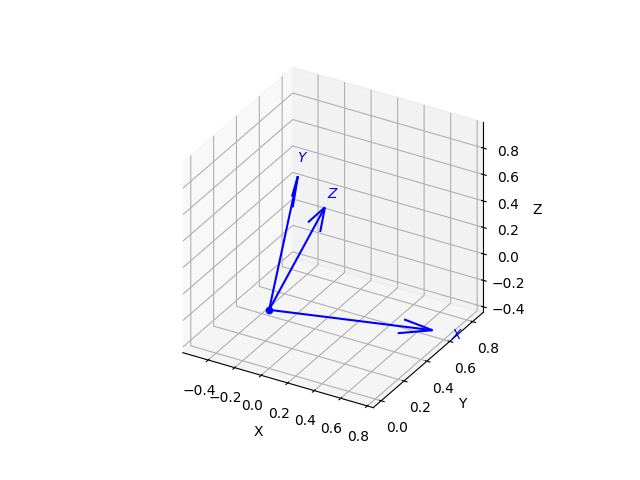

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
q.plot();

## 2.3.2 Pose in Three Dimensions


### 2.3.2.1 Homogeneous Transformation Matrix


In [ ]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0) #Эта строка создает композитную трансформацию T,
            #которая сначала перемещает объект на 2 единицы вдоль оси X,
            #затем вращает его на 90 градусов вокруг оси X, и наконец,
            #перемещает на 1 единицу вдоль оси Y.

array([[       1,        0,        0,        2],
       [       0,        0,       -1,        0],
       [       0,        1,        0,        1],
       [       0,        0,        0,        1]])

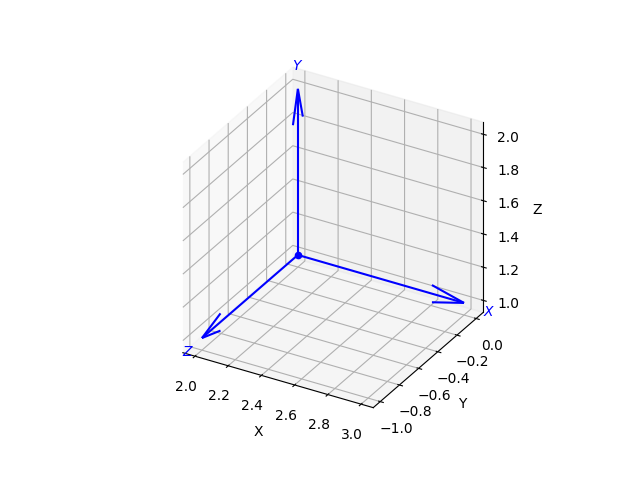

In [ ]:
plotvol3(new=True)  # for matplotlib/widget
trplot(T);

In [ ]:
HTML(tranimate(T, movie=True, dim=5))

In [ ]:
t2r(T) #Возвращает матрицу вращения из композитной трансформации T, игнорируя ее трансляционную компоненту.

array([[       1,        0,        0],
       [       0,        0,       -1],
       [       0,        1,        0]])

In [ ]:
transl(T) #Возвращает вектор трансляции из композитной трансформации T, позволяя анализировать, насколько объект был смещен в пространстве.

array([       2,        0,        1])

### 2.3.2.2 Matrix exponential for Pose


In [ ]:
T = transl(2, 3, 4) @ trotx(0.3)

array([[       1,        0,        0,        2],
       [       0,   0.9553,  -0.2955,        3],
       [       0,   0.2955,   0.9553,        4],
       [       0,        0,        0,        1]])

In [ ]:
L = linalg.logm(T)

array([[       0,        0,        0,        2],
       [       0,        0,     -0.3,    3.577],
       [       0,      0.3,        0,     3.52],
       [       0,        0,        0,        0]])

In [ ]:
S = vexa(L)

array([       2,    3.577,     3.52,      0.3,        0,        0])

In [ ]:
linalg.expm(skewa(S))

array([[       1,        0,        0,        2],
       [       0,   0.9553,  -0.2955,        3],
       [       0,   0.2955,   0.9553,        4],
       [       0,        0,        0,        1]])

In [ ]:
X = skewa([1, 2, 3, 4, 5, 6])

array([[       0,       -6,        5,        1],
       [       6,        0,       -4,        2],
       [      -5,        4,        0,        3],
       [       0,        0,        0,        0]])

In [ ]:
vexa(X)

array([       1,        2,        3,        4,        5,        6])

### 2.3.2.3 3D Twists


In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])

(0 0 0; 1 0 0)

In [ ]:
linalg.expm(0.3 * skewa(S.S));  # different to book, see §2.2.1.2

In [ ]:
S.exp(0.3)

   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


In [ ]:
S = Twist3.UnitRevolute([0, 0, 1], [2, 3, 2], 0.5)

(3 -2 0.5; 0 0 1)

In [ ]:
X = transl(3, 4, -4);

In [ ]:
for theta in np.arange(0, 15, 0.3):
  trplot(S.exp(theta).A @ X, style="rviz", width=2)

L = S.line()
L.plot('k:', linewidth=2);


Axes3D(0.22375,0.11;0.5775x0.77)


In [ ]:
S = Twist3.UnitPrismatic([0, 1, 0])

(0 1 0; 0 0 0)

In [ ]:
S.exp(2)

   1         0         0         0         
   0         1         0         2         
   0         0         1         0         
   0         0         0         1         


In [ ]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

(1.1204 1.6446 3.1778; 0.041006 0.4087 0.78907)

In [ ]:
S.w

array([ 0.04101,   0.4087,   0.7891])

In [ ]:
S.pole

array([0.001138,   0.8473,  -0.4389])

In [ ]:
S.pitch

3.2256216289351296

In [ ]:
S.theta

0.8895797456112914

# 2.4 Advanced Topics


## 2.4.5 Distance Between Orientations


In [ ]:
UnitQuaternion.Rx(pi / 2).angdist(UnitQuaternion.Rz(-pi / 2))

1.0471975511965976

## 2.4.6 Normalization


In [ ]:
R = np.eye(3,3);
np.linalg.det(R) - 1

0.0

In [ ]:
for i in range(100):
  R = R @ rpy2r(0.2, 0.3, 0.4);
np.linalg.det(R) - 1

5.773159728050814e-15

In [ ]:
R = trnorm(R);

In [ ]:
np.linalg.det(R) - 1

2.220446049250313e-16

In [ ]:
q = q.unit();

In [ ]:
# T = T1 @ T2
# q = q1 @ q2

## 2.4.8 More About Twists


In [ ]:
S = Twist3.UnitRevolute([1, 0, 0], [0, 0, 0])

(0 0 0; 1 0 0)

In [ ]:
S.S
S.v
S.w

array([       1,        0,        0])

In [ ]:
S.skewa()

array([[       0,        0,        0,        0],
       [       0,        0,       -1,        0],
       [       0,        1,        0,        0],
       [       0,        0,        0,        0]])

In [ ]:
trexp(0.3 * S.skewa())

array([[       1,        0,        0,        0],
       [       0,   0.9553,  -0.2955,        0],
       [       0,   0.2955,   0.9553,        0],
       [       0,        0,        0,        1]])

In [ ]:
S.exp(0.3)

   1         0         0         0         
   0         0.9553   -0.2955    0         
   0         0.2955    0.9553    0         
   0         0         0         1         


In [ ]:
S2 = S * S
S2.printline(orient="angvec", unit="rad")

t = 0, 0, 0; angvec = (2 | 1, 0, 0)


In [ ]:
line = S.line()

{ 0 0 0; 1 0 0}

Axes3D(0.125,0.11;0.775x0.77)


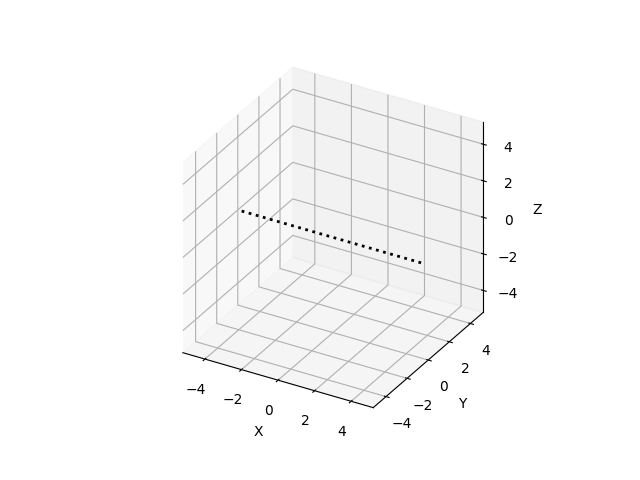

In [ ]:
plotvol3([-5, 5], new=True)  # setup volume in which to display the line
line.plot("k:", linewidth=2);

In [ ]:
T = transl(1, 2, 3) @ eul2tr(0.3, 0.4, 0.5);
S = Twist3(T)

(1.1204 1.6446 3.1778; 0.041006 0.4087 0.78907)

In [ ]:
S / S.theta

(1.2594 1.8488 3.5722; 0.046096 0.45943 0.88702)

In [ ]:
S.unit();

In [ ]:
S.exp(0)

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [ ]:
S.exp(1)

   0.6305   -0.6812    0.372     1         
   0.6969    0.7079    0.1151    2         
  -0.3417    0.1867    0.9211    3         
   0         0         0         1         


In [ ]:
S.exp(0.5)

   0.9029   -0.3796    0.2017    0.5447    
   0.3837    0.9232    0.01982   0.9153    
  -0.1937    0.05949   0.9793    1.542     
   0         0         0         1         


<span style="background-color:red; font-size:20pt">NOTE</span>

The next cell will launch an interactive tool (using the Swift visualizer) in a new browser tab.  Close the browser tab when you are done with it.

You might also have to stop the cell from executing, by pressing the stop button for the cell. It may terminate with lots of errors, don't panic.

In [ ]:
if COLAB or not SWIFT:
    print("we can't run this demo from the Colab environment (yet)")
else:
    %run -m twistdemo

we can't run this demo from the Colab environment (yet)


# 2.5 Using the Toolbox


In [ ]:
from spatialmath.base import *

In [ ]:
from spatialmath import *

In [ ]:
R = rotx(0.3)  # create SO(3) matrix as NumPy array
type(R)
R = SO3.Rx(0.3)  # create SO3 object
type(R)

spatialmath.pose3d.SO3

In [ ]:
R.A

array([[       1,        0,        0],
       [       0,   0.9553,  -0.2955],
       [       0,   0.2955,   0.9553]])

In [ ]:
R = SO3(rotx(0.3));                   # convert an SO(3) matrix
R = SO3.Rz(0.3);                      # rotation about z-axis
R = SO3.RPY(10, 20, 30, unit="deg");  # from roll-pitch-yaw angles
R = SO3.AngleAxis(0.3, (1, 0, 0));    # from angle and rotation axis
R = SO3.EulerVec((0.3, 0, 0));        # from an Euler vector

In [ ]:
R.rpy();        # convert to roll-pitch-yaw angles
R.eul();        # convert to Euler angles
R.printline();  # compact single-line print

 rpy/zyx = 17.2°, 0°, 0°


In [ ]:
R = SO3.RPY(10, 20, 30, unit="deg");             # create an SO(3) rotation
T = SE3.RPY(10, 20, 30, unit="deg");             # create a purely rotational SE(3)
S = Twist3.RPY(10, 20, 30, unit="deg");          # create a purely rotational twist
q = UnitQuaternion.RPY(10, 20, 30, unit="deg");  # create a unit quaternion

In [ ]:
TA = SE2(1, 2) * SE2(30, unit="deg");
type(TA)

spatialmath.pose2d.SE2

In [ ]:
TA

   0.866    -0.5       1         
   0.5       0.866     2         
   0         0         1         


In [ ]:
TA = SE2(1, 2, 30, unit="deg");

In [ ]:
TA.R
TA.t

array([       1,        2])

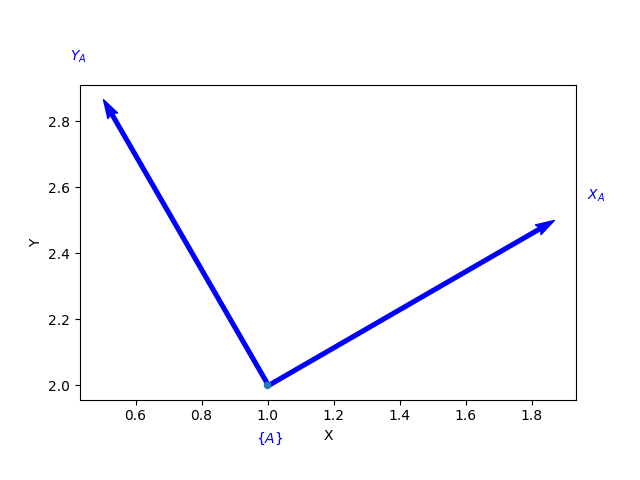

In [ ]:
plotvol2(new=True)  # for matplotlib/widget
TA.plot(frame="A", color="b");

In [ ]:
TA.printline()

t = 1, 2; 30°


In [ ]:
P = [3, 2];
TA.inv() * P

array([[   1.732],
       [      -1]])

In [ ]:
R = SO3.Rx(np.linspace(0, 1, 5));
len(R)
R[3]

   1         0         0         
   0         0.7317   -0.6816    
   0         0.6816    0.7317    


In [ ]:
R * [1, 2, 3]

array([[       1,        1,        1,        1,        1],
       [       2,    1.196,   0.3169,  -0.5815,   -1.444],
       [       3,    3.402,    3.592,    3.558,    3.304]])